
**1. 1차원데이터분석**

**1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

**2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

**3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

**1.** **공분산/ 상관계수**

**2.** **다중공선성확인**

**3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사
- carrier_deay : 항공사 지연 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

#

# 1. 데이터 

변주형 변수 : airline
수치형 변수: pct_carrier_delay, pct_atc_delay, pct_weather_delay

In [49]:
import pandas as pd

In [51]:
#한글폰트 검색
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
  if i.name.find('Gulim') != -1 :
    print(i.name)

Gulim
New Gulim


In [53]:
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

In [70]:
# read file 
df = pd.read_csv('data/airline_stats.csv')
# check how data looks like
df.head()


,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [12]:
# checking variable types
df.dtypes


pct_carrier_delay    float64
pct_atc_delay        float64
pct_weather_delay    float64
airline               object
dtype: object

In [65]:
df.columns, df.count()


(Index(['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay', 'airline'], dtype='object'),
 pct_carrier_delay    33440
 pct_atc_delay        33440
 pct_weather_delay    33440
 airline              33468
 dtype: int64)

# 2. 데이터 전처리
2.1 결측치 탐색 
- pct_carrier_delay, pct_atc_delay, pct_weather_delay (each 28)   

2.2 결측치 처리 
- 총 33440건의 데이터 중 29,0.083662%
- NA,NA,NA,"United"
- NaN 값들이 이런 형식으로 존재
- 또한 아무런 정보가 없다고 판단하고 제외하고 분석하기로 결정 

In [22]:
#checking if there is NaN value on the column 
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [ ]:
# 결측치 제거하기  
df1 = df.dropna()
print(df1.count())


pct_carrier_delay    33440
pct_atc_delay        33440
pct_weather_delay    33440
airline              33440
dtype: int64


In [ ]:
#check if it has been droped
df1.isnull().sum()

(pct_carrier_delay    0
 pct_atc_delay        0
 pct_weather_delay    0
 airline              0
 dtype: int64,
 pct_carrier_delay    33440
 pct_atc_delay        33440
 pct_weather_delay    33440
 airline              33440
 dtype: int64)

In [66]:
# 수치형 변수의 최대/최소/대표값
df1.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [34]:
# selecting only numeric columns 
df1.select_dtypes(include='number').describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [39]:
#범주형 변수의 값 목록 
airline_counts = df1['airline'].value_counts()

In [36]:
airline_grouped = df1.groupby('airline').describe().T #가로세로 바꾸기 
airline_grouped

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

In [37]:
df1.groupby('airline')['pct_carrier_delay'].describe().T #가로세로 바꾸기 

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 항공사별 비교: "Delay Profile Analysis by Airline"

(1) 항공사 빈도수 분포 (막대그래프)   
(2) 항공사별 carrier 지연률 비중 (전체 지연 중 각 항공사 비율) (막대그래프)   
(3) 항공사별 ATC 지연률 (Box plot)   
(4) 항공사별 Weather 지연률 (Box plot)   

C:\Users\Admin\AppData\Local\Temp\ipykernel_10044\2365203369.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_pct.values, y=carrier_pct.index, ax=axes2, palette='Blues_r')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10044\2365203369.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atc_pct.values, y=atc_pct.index, ax=axes3, palette='Blues_r')


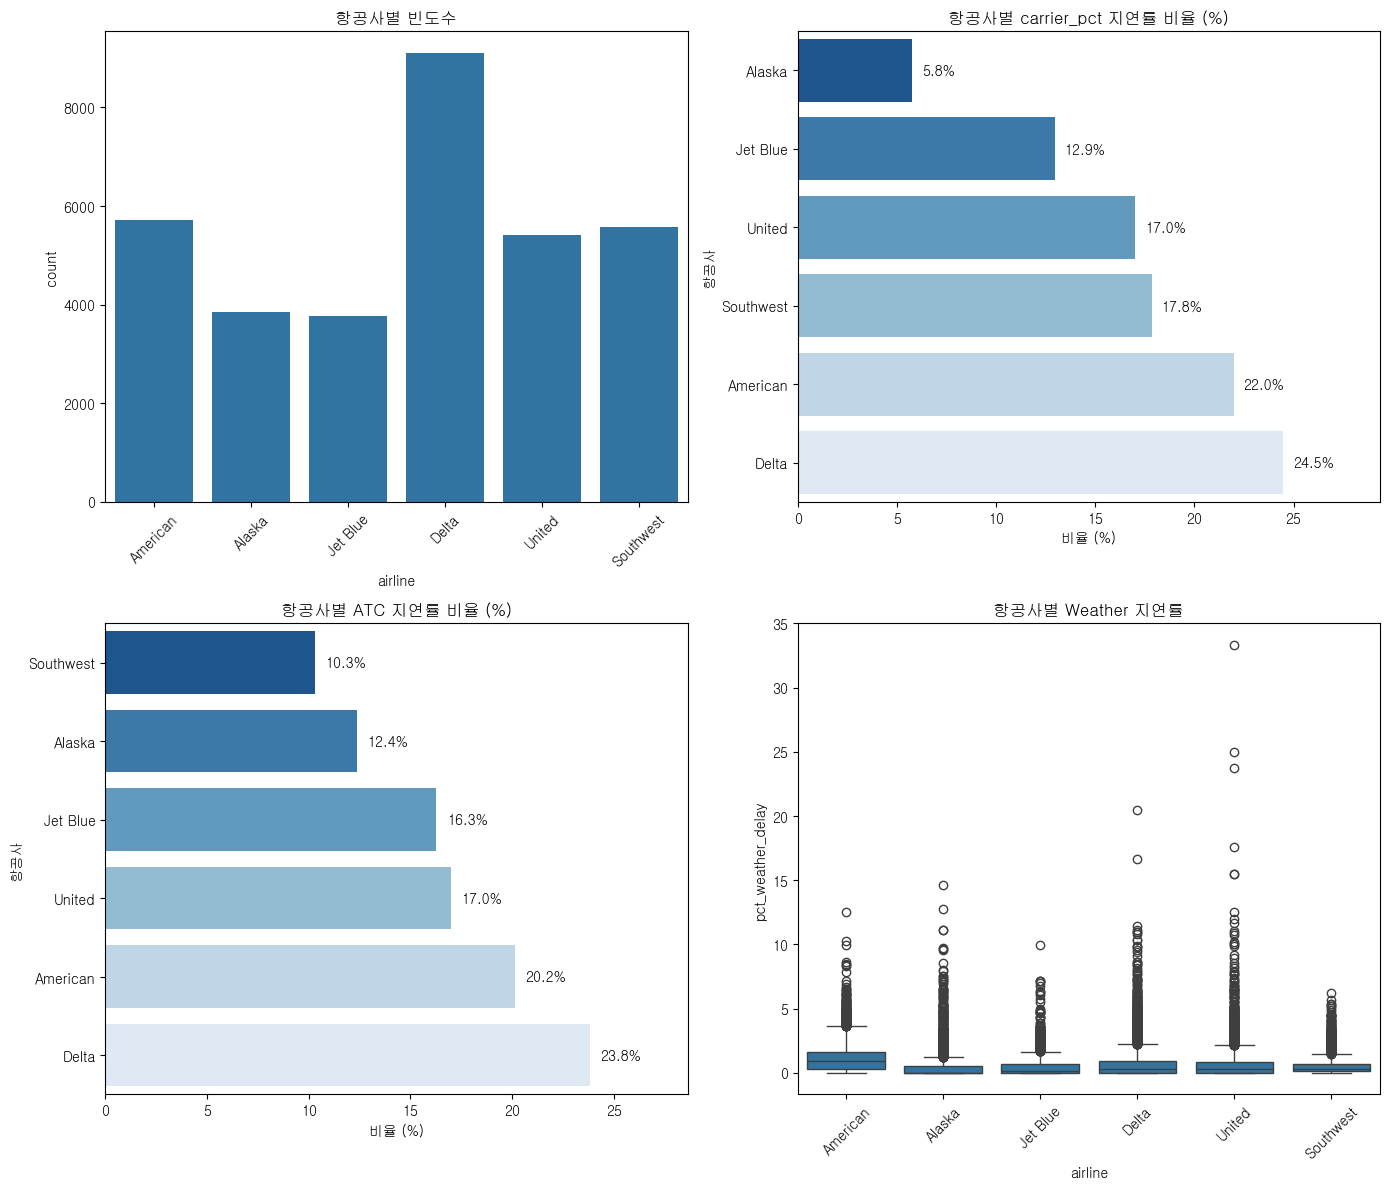

In [73]:
# Setup figure with 3 plots
fig = plt.figure(figsize=(14, 12)) 
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

# 1. Bar chart: Frequency of each airline
sns.countplot(ax=axes1, x='airline', data=df1)
axes1.set_title('항공사별 빈도수')
axes1.tick_params(axis='x', rotation=45)

# 2. Bar chart: airline % of total carrier delay
carrier_sum = df1.groupby('airline')['pct_carrier_delay'].sum()
carrier_pct = (carrier_sum / carrier_sum.sum()) * 100
carrier_pct = carrier_pct.sort_values()  #ascending order

sns.barplot(x=carrier_pct.values, y=carrier_pct.index, ax=axes2, palette='Blues_r')
axes2.set_title('항공사별 carrier_pct 지연률 비율 (%)')
axes2.set_xlabel('비율 (%)')
axes2.set_ylabel('항공사')
axes2.set_xlim(0, carrier_pct.max() * 1.2)

# Add percentage labels next to bars
for i, v in enumerate(carrier_pct.values):
    axes2.text(v + 0.5, i, f"{v:.1f}%", va='center')

# 3. Bar chart: airline % of total ATC delay
atc_sum = df.groupby('airline')['pct_atc_delay'].sum()
atc_pct = (atc_sum / atc_sum.sum()) * 100
atc_pct = atc_pct.sort_values()

sns.barplot(x=atc_pct.values, y=atc_pct.index, ax=axes3, palette='Blues_r')
axes3.set_title('항공사별 ATC 지연률 비율 (%)')
axes3.set_xlabel('비율 (%)')
axes3.set_ylabel('항공사')
axes3.set_xlim(0, atc_pct.max() * 1.2)

# 퍼센트 값 라벨 추가
for i, v in enumerate(atc_pct.values):
    axes3.text(v + 0.5, i, f"{v:.1f}%", va='center')

# 4. Boxplot of each aitlines pct_weather_delay
sns.boxplot(x='airline', y='pct_weather_delay', data=df, ax=axes4)
axes4.set_title('항공사별 Weather 지연률')
axes4.tick_params(axis='x', rotation=45)

# Layout fix
plt.tight_layout()
plt.show()

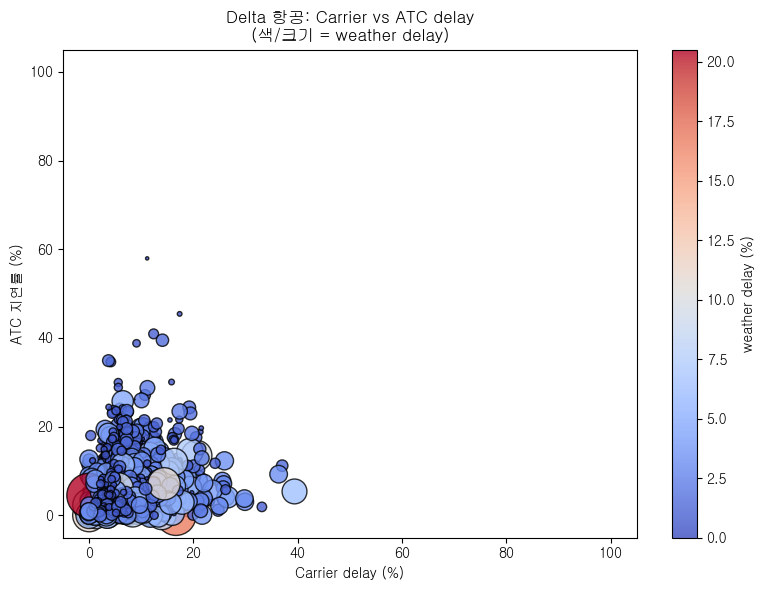

In [60]:
# look at Delta's: pct_carrier_delay, pct_atc_delay, pct_weather_delay
# 델타 항공의 데이터만 보기: carrier와 pct delay의 상관관계
# 날씨 영향은 점의 크기와 색으로 표현 
delta_df = df[df['airline'] == 'Delta']

fig2, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    x=delta_df['pct_carrier_delay'],
    y=delta_df['pct_atc_delay'],
    s=delta_df['pct_weather_delay'] * 50,
    c=delta_df['pct_weather_delay'],
    cmap='coolwarm',
    alpha=0.8,
    edgecolors='black'
)

ax.set_title('Delta 항공: Carrier vs ATC delay\n(색/크기 = weather delay)')
ax.set_xlabel('Carrier delay (%)')
ax.set_ylabel('ATC 지연률 (%)')

# Add colorbar
fig2.colorbar(scatter, ax=ax, label='weather delay (%)')

plt.tight_layout()
plt.show()